<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/central-limit-theorem.png" width="600"> 
</center>

[How to explain Normal Distribution to a bro at the gym](https://www.reddit.com/r/funny/comments/m4aaee/how_to_explain_normal_distribution_to_a_bro_at/)

# Андан на экономе

## Семинар 7: мощь средних

In [1]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid", palette="muted")

## 1. Примерная схема матстата 

__Задача:__ мы предполагаем, что какая-то штука описывается каким-то распределением с параметром $\theta$. Чтобы понимать эту штуку, нам нужно параметр $\theta$ оценить. __Важно:__ мы препдполагаем, что $\theta$ - константа. 

<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/matstat_sh.png" width="750"> 

__Оценивание:__ получить оценку $\hat \theta$ можно разными методами. Например, методом моментов или методом максимального правдоподобия. 

__Точечная оценка:__ Та оценка, которую мы поулчим, будет функцией от выборки, то есть слуайной величиной. Если у нас есть одна выборка, то будет одна оценка. Если другая выборка, то будет другая оценка. Нам бы хотелось понимать, насколько другой может оказаться оценка при новой выборке. Для этого нам нужно знать, как эта оценка распределена. 

Зная распределение оценки, мы сможем посмотреть в каком диапазоне находится $95\%$ её вероятностной массы и сказать, что за края этого диапазона истиное значение будет вылетать редко. Этот диапозон называется доверительным интервалом. Если он получается коротким, то оценка довольно точная. Если длинным, то не очень.

__Распределение оценки:__ Чтобы построить для оценки параметра доверительный интервал, нужно знать, как эта оценка распределена. Тут нам на помощь приходят разные союзники. Например, для среднего это ЦПТ. Она говорит, что среднее асимптотически нормально распределено, и мы можем использовать нормальное распределение для доверительных интервалов и проверки гипотез. Есть и другие союзники, которые помогают нам в разных ситуациях понимать, насколько точными оказались прогнозы и отвечать на вопросы. 

Вы их будете подробно разбирать на лекциях по матстату.

### Метод моментов

ЗБЧ говорит нам, что $$\bar x_n \overset{p}{\to}  \mathbb{E}(X_1).$$ 

То есть при больших $n$  $$\bar x_n \approx \mathbb{E}(X_1).$$

Из этого уравнения мы можем получить оценку для неизвестного параметра.

__Пример:__

Для выборки 

$$X_1, \ldots, X_n \sim iid \quad U[0; a].$$ 

Мы можем оценить неизвестный параметр $a$ с помощью метода моментов 

$$\bar x_n = \frac{a}{2} \Rightarrow \hat{a} = 2 \bar x_n.$$

In [23]:
a = 100 # природа задумала параметр

uniform_gen = sts.uniform(0, a)
x = uniform_gen.rvs(100) # природа дала нам выборку
x[:5]

array([ 2.68919015, 22.98151547, 55.80076765, 71.89530108, 28.00326099])

In [24]:
# мы оценили методом моментов параметр a
a_hat = 2 * x.mean()
a_hat

90.8842921959866

Точечная оценка может сильно измениться, если изменится выборка.

In [25]:
x = uniform_gen.rvs(100)
2 * x.mean()

99.16172046711026

In [26]:
x = uniform_gen.rvs(100)
2 * x.mean()

100.86910843354177

Чтобы понимать, в каком диапазоне лежит неизвестный параметр $a$ придумали __доверительные интервалы.__ С помощью функции ниже можно изобразить диапазон, в который нормальная случайная величина попадает с вероятностью $0.95$.

(-1.959963984540054, 1.959963984540054)

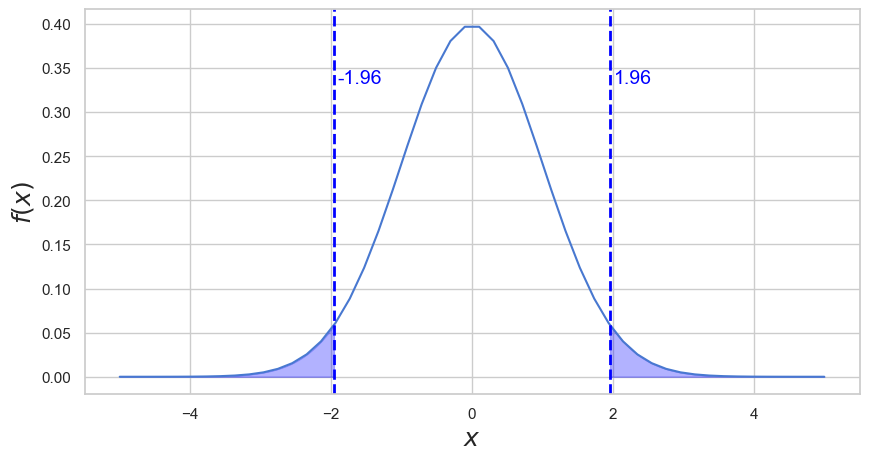

In [27]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """
    
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = sts.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = sts.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = sts.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right
    
alpha = 0.05
norm_conf_int(0.05)

ЦПТ говорит нам, что среднее имеет асимптотически нормальное распределение

$$ 
\bar x \overset{asy}{\sim} N \left(\mu, \frac{\hat{\sigma}^2}{n}\right).
$$ 

На основе этого мы можем построить для среднего доверительный интервал. Окажется, что это 

$$
\bar x_n \pm z_{1 - \frac{\alpha}{2}} \cdot \frac{\hat \sigma}{\sqrt{n}}
$$

Откуда взялась такая формула вы подробно поговорить на лекциях по матстату. Пока что можно прочитать [небольшую историю про Шарика, Матроскина и их деревню.](https://github.com/FUlyankin/matstat-AB/blob/main/week06_matstat_sh/hypotesovo.pdf)

__Пример:__

В случае равномерного распределения из задачки выше 

$$
\hat{a} = 2 \bar x_n \overset{asy}{\sim} N \left(a, \frac{a^2}{3 n}\right) 
$$

так как

$$
\mathbb{E}(\hat a) = 2 \mathbb{E}(\bar x_n) = 2 \cdot \mathbb{E} \left( \frac{x_1 + \ldots + x_n}{n} \right) = 2 \cdot \frac{n \cdot \mathbb{E}(x_1)}{n} = 2 \cdot \mathbb{E}(x_1) = 2 \cdot \frac{a}{2} = a
$$

$$
\text{Var}(\hat a) = 4 \cdot \text{Var}(\bar x_n) = 4 \cdot \text{Var} \left( \frac{x_1 + \ldots + x_n}{n} \right) = 4 \cdot \frac{n \cdot \text{Var}(x_1)}{n^2} = \frac{4}{n} \cdot \text{Var}(x_1) = \frac{4}{n}  \cdot \frac{a^2}{12} = \frac{a^2}{3n}
$$

Над неизвестным параметром $a$ в оценке дисперсии можно поставить колпачок. [Это не испортит сходимость](https://www.youtube.com/watch?v=j3KbhEryEGU&list=PLCf-cQCe1FRxoI9khulGS0cDaUNaSTa7A&index=2) к нормальному распределению.

$$
\hat{a} = 2 \bar x_n \overset{asy}{\sim} N \left(a, \frac{\hat{a}^2}{3 n}\right) 
$$

Получаем доверительный интервал для $a$

$$
2 \cdot \bar x_n \pm z_{1 - \frac{\alpha}{2}} \cdot \frac{\hat a}{\sqrt{3n}}
$$

In [28]:
a = 10
n = 100

x = uniform_gen.rvs(100)
2 * x.mean()

a_hat = 2 * x.mean()
std_hat = a_hat/np.sqrt(3*n)

(95.6695818210315, 120.08394288435852)

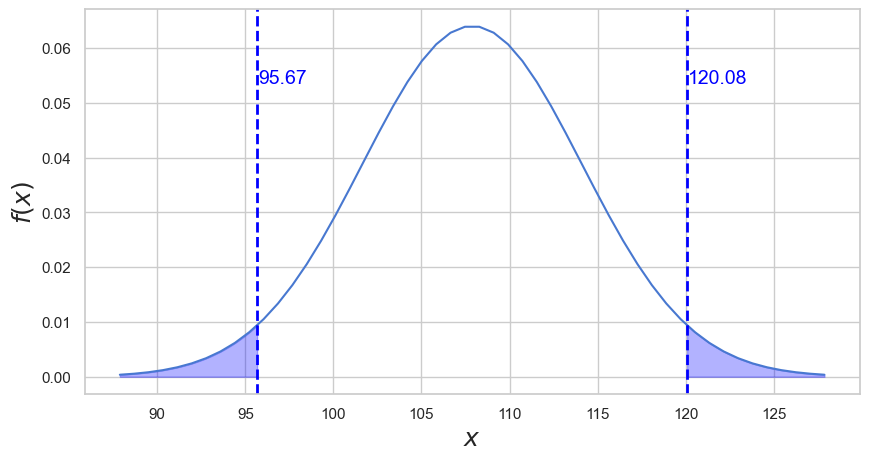

In [29]:
alpha = 0.05
norm_conf_int(alpha = 0.05, mean_hat=a_hat, std_hat=std_hat, margin=20)

### Упражнение  (доверительный интервал) 

Доверительный интервал покрывает истиное значение параметра с вероятностью $1 - \alpha$. Пусть 

$$X_1, \ldots, X_n \sim iid \quad U[0; a],$$ 

истиное значение $a=10$, $n=100$ и $\hat{a} = 2 \bar x_n.$ Постройте для $a$ с помощью ЦПТ $95\%$ асимптотический доверительный интервал и убедитесь, что он покрывает истиное значение $a$ с вероятностью $0.95$.

In [39]:
a = 10
n = 100

uniform_gen = sts.uniform(0, a)

alpha = 0.05
z_alpha = sts.norm().ppf(1 - alpha/2)

n_obs = 10**5
cnt = 0

for i in range(n_obs):
    
    x = uniform_gen.rvs(n)
    a_hat = 2 * x.mean()
    std_hat = a_hat/np.sqrt(3*n)
    
    left = a_hat - z_alpha * std_hat
    right = a_hat + z_alpha * std_hat
    if left <= a <= right:
        cnt += 1

In [40]:
cnt / n_obs # вероятность того что мы накроем истиное a

0.9478